# Udacity-s-Data-Analyst-Nanodegree---Project-5
# US YouTube Dataset investigation
## by (Yousef Adel)

## Investigation Overview

The goal of this study is to investigate a dataset that contains records for video traffic on YouTube, including a variety of variables. During this, I will visualize the data to find out the trends in the data set and between to find out the correlation between likes, dislikes, views, comment count to identify the elements. 


## Dataset Overview
Context YouTube (the world-famous video sharing website) maintains a list of the top trending videos on the platform. According to Variety magazine, “To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions (number of views, shares, comments and likes). Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously virile “Gangam Style”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
# Reading a clean version of the dataset for analysis
df_clean = pd.read_csv('USvideos2.csv')
df = df_clean.copy()

## The distribution for (likes, dislikes, views, comment count) 
(with numpy log function).

#### AS we can see here the distribution for (likes, dislikes, views, comment count) is a normal distribution which tells us how closely all of the these columns are near around the mean in the data set. We can detect some of outlier in comment_count and dislike.


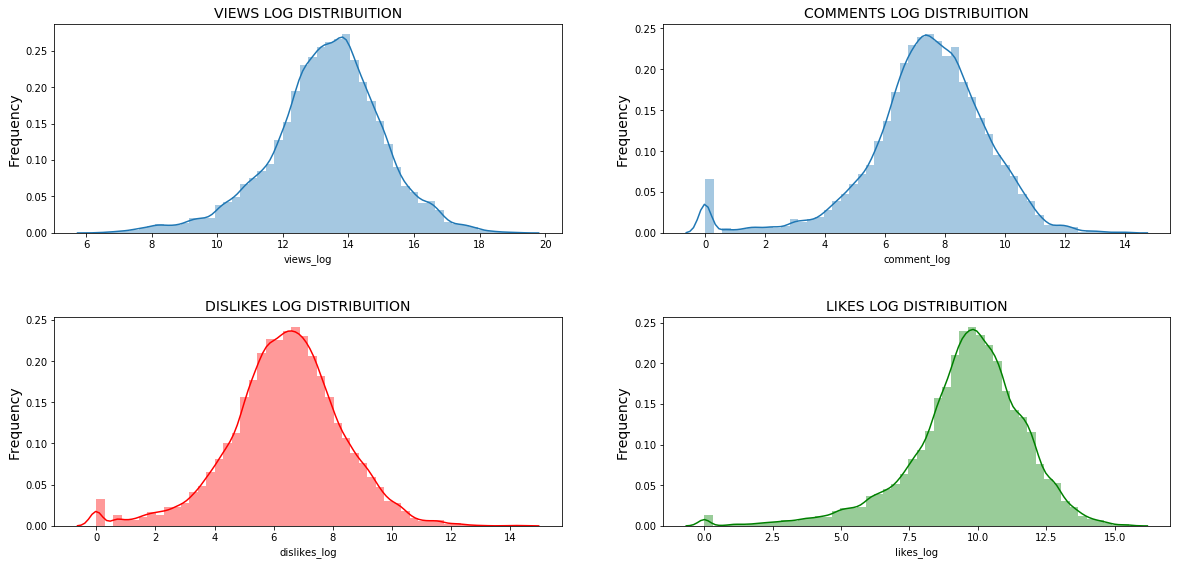

In [3]:
#Check distrubtion for (likes, dislikes, views)
plt.figure(figsize = (20,9))
#check for view_log
plt.subplot(2,2,1)
g1 = sb.distplot(df_clean['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#check for likes_log
plt.subplot(2,2,4)
g2 = sb.distplot(df_clean['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#check for dislikes_log
plt.subplot(2,2,3)
g3 = sb.distplot(df_clean['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#check for comment_log
plt.subplot(2,2,2)
g4 = sb.distplot(df_clean['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)


## What is the common category name in the dataset ? 
#### As illustrated in the chart below the most common category in YouTube that users upload videos to is entertainmentThe bar fot this category is clarified with red color As shown in the plot it is cleary way higher than the others

Text(0, 0.5, 'Count')

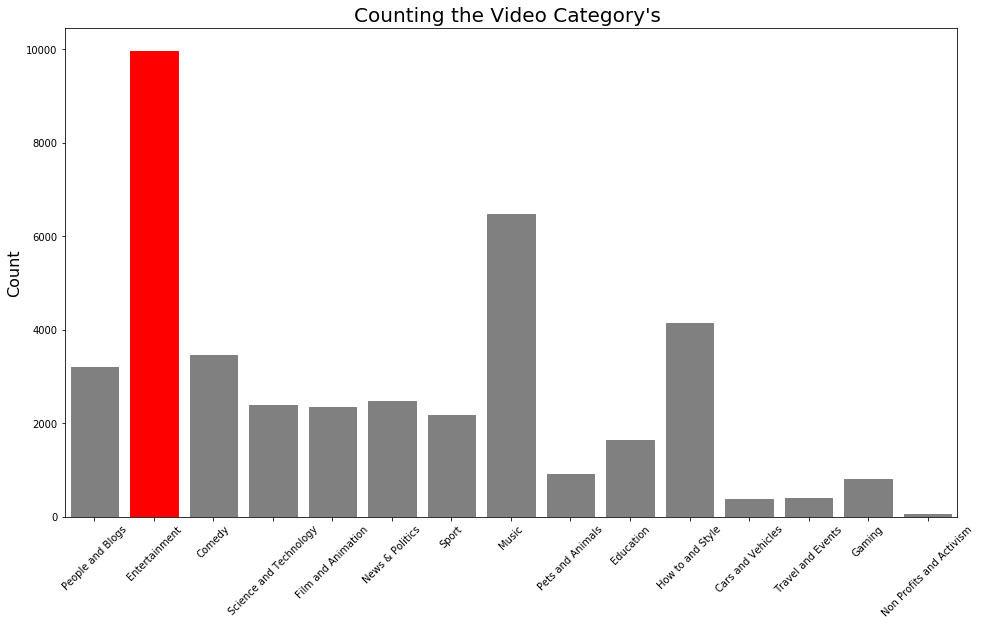

In [20]:
# Barplot to count the number of each category in category names
plt.figure(figsize = (16,9))
ax = sb.countplot(x="category_name", data=df,  orient ='H')
for bar in ax.patches:
    if bar.get_height() > 8000:
        bar.set_color('red')    
    else:
        bar.set_color('grey')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Counting the Video Category's ", fontsize=20)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Count", fontsize=16)

## What is the most common name for channels? With word cloud

#### to detect the most common name in channels I used wordcloud to detect the repeated names and what is frequent throughout the names of channels in this dataset. the more the words are big the more it is frequent in the dataset. According to this wordcloud the most frequent channels are these mentioned below:
    -Late show
    -ESPN
    -Show Starting
    -Netflix
    -Stephen Colbert
    -Starring Jimmy

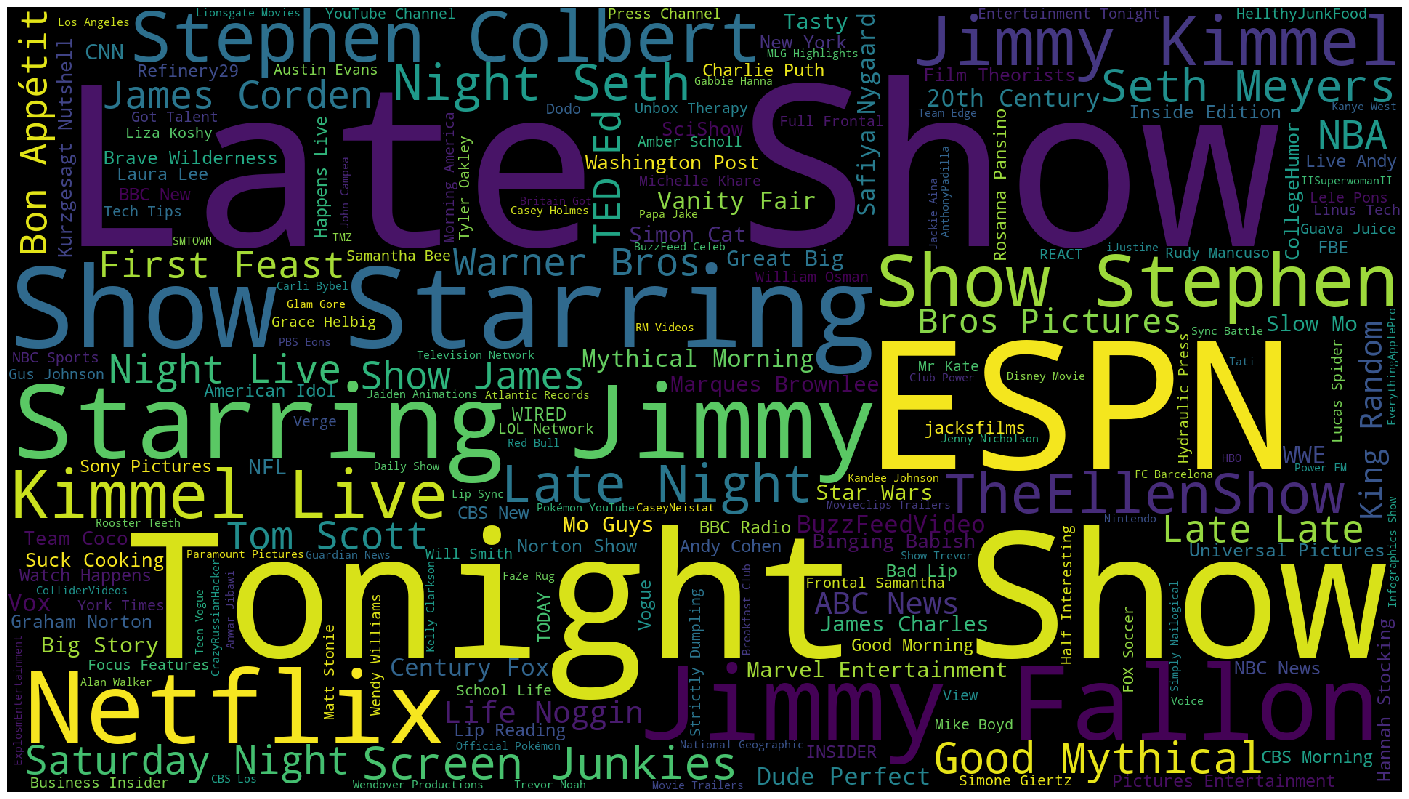

In [5]:
# Work cloud to detect the most common words in channel names
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.channel_title))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('category.png')
plt.show()

What are the correlation between the following variables?
- likes
- dislikes
- views 
- comment count

## What is the relation between likes & dislikes with comment count & views ?
#### This chart is meant to describe the correlation between the select variables as below. 
#### we can detect the following 
- Strong correlation between the number of views and the increase of dislike for each videos 
- Strong positive correlation between the number of comments and views
- strong positive correlation between likes and comment_count
- in dislikes two chart we can observe that the spread is limited between 0 and 250000 on x-axis.
- All of them have a lot of outliers which reflect the expcetional few videos that have very high number of views, likes, comment count, dislikes


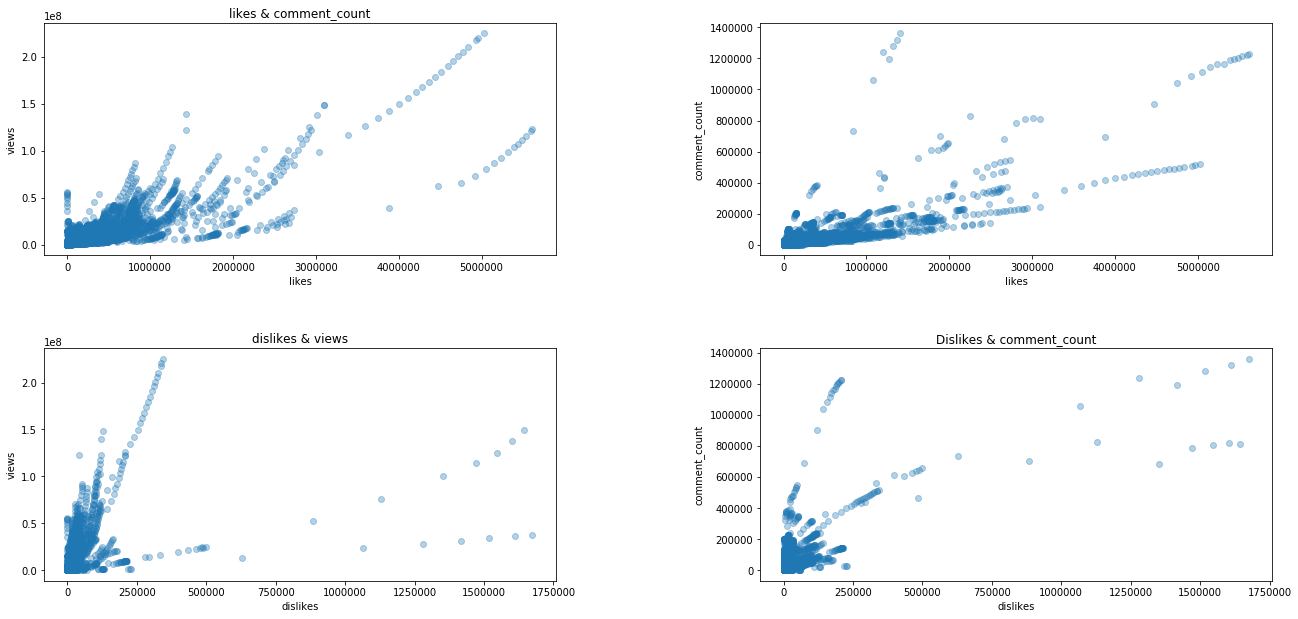

In [30]:
base_color = sb.color_palette()[0]
plt.figure(figsize = (22,10))
plt.subplot(2,2,1)

ax = sb.regplot(data = df, x = 'likes', y = 'views', fit_reg = False, scatter_kws = {'alpha' : 1/3})
ax.set_title("Likes & views", fontsize=12)

plt.subplot(2,2,2)
sb.regplot(data = df, x = 'likes', y = 'comment_count', fit_reg = False, scatter_kws = {'alpha' : 1/3})
ax.set_title("likes & comment_count", fontsize=12)

plt.subplot(2,2,3)
ax = sb.regplot(data = df, x = 'dislikes', y = 'views', fit_reg = False, scatter_kws = {'alpha' : 1/3})

ax.set_title("dislikes & views", fontsize=12)

plt.subplot(2,2,4)
ax =sb.regplot(data = df, x = 'dislikes', y = 'comment_count', fit_reg = False, scatter_kws = {'alpha' : 1/3})
ax.set_title("Dislikes & comment_count", fontsize=12)

plt.subplots_adjust(wspace = 0.4, hspace = 0.4,top = 0.9)



## What is the distrubtion for (likes, dislikes, views, comment count) with category names ?
#### Box plot for likes, views, dislike, comment_count (with log vaules)
#### Through out this boxplot we can conclude the follwing:
- We have a lot of outliers which indcates the number of few videos with radically low or high number than the other
- In dislike chart the entertainment category have a lot of outliers in both direction which indicates that dislike for videos could be very high or low 

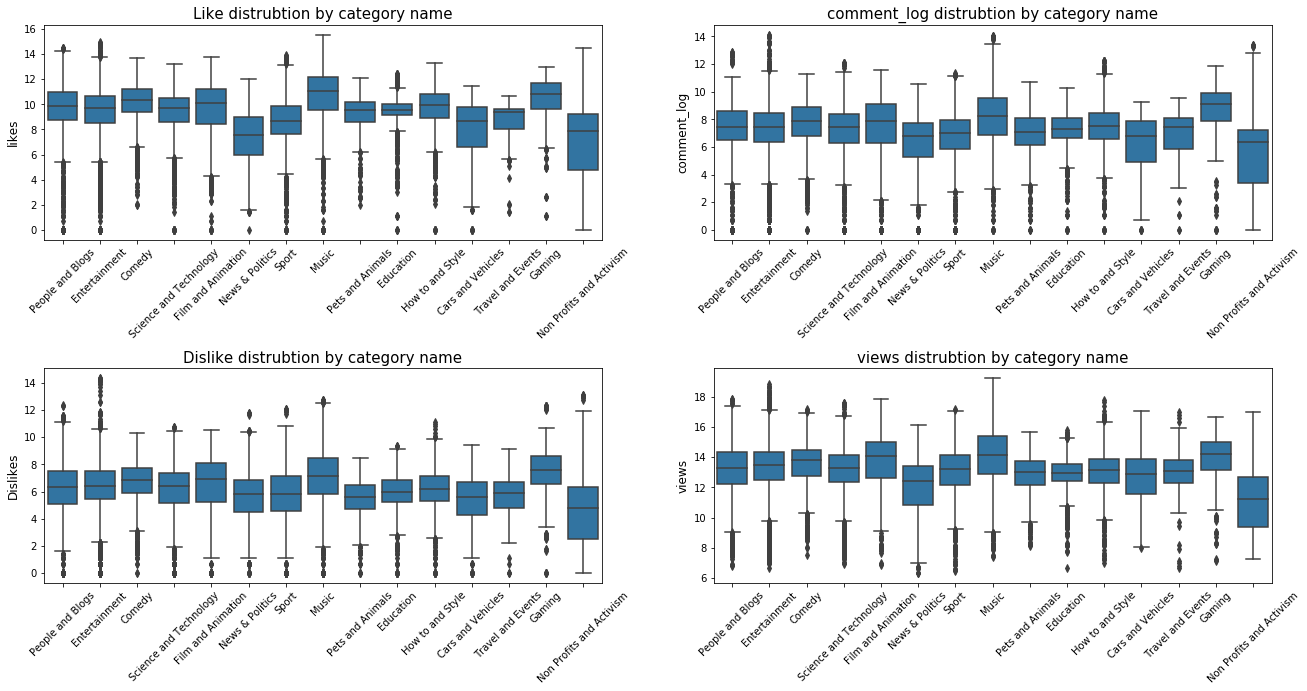

In [18]:
base_color = sb.color_palette()[0]

plt.figure(figsize = (22,10))
plt.subplot(2,2,1)
ax = sb.boxplot(data = df_clean, x= 'category_name', y = 'likes_log', color = base_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Like distrubtion by category name", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("likes", fontsize=12)

plt.subplot(2,2,4)
ax = sb.boxplot(data = df_clean, x= 'category_name', y = 'views_log', color = base_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("views distrubtion by category name", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("views", fontsize=12)

plt.subplot(2,2,3)
ax = sb.boxplot(data = df_clean, x= 'category_name', y = 'dislikes_log', color = base_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Dislike distrubtion by category name", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("Dislikes", fontsize=12);


plt.subplot(2,2,2)
ax = sb.boxplot(data = df_clean, x= 'category_name', y = 'comment_log', color = base_color)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("comment_log distrubtion by category name", fontsize=15)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel("comment_log", fontsize=12);

plt.subplots_adjust(wspace = 0.2, hspace = 0.6,top = 0.9)




## What is the highest channel in vewis? 

#### This bar chart is counting the the views for each 12 max channels in this dataset. as we can observe here the most popular channel among the views is "ChildishGambinoVEVO" followed by "ibright" followed by "Dude Perfect".

Text(0.5, 1.0, 'The most popular channel')

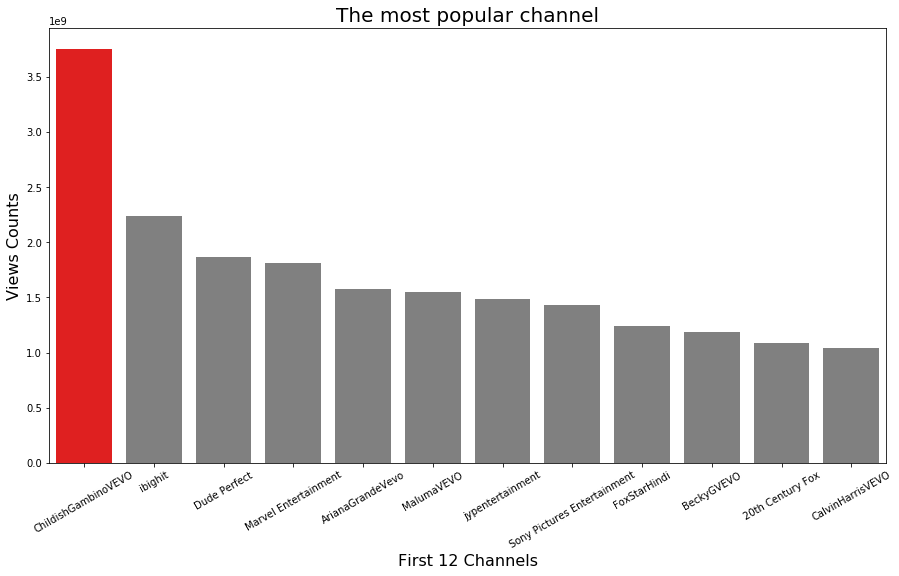

In [17]:
Best_twl = df[['channel_title', 'views']]
Best_twl = Best_twl.groupby('channel_title')['views'].sum()
Best_twl = pd.DataFrame(Best_twl)
Best_twl = Best_twl.sort_values('views', ascending=False)
Best_twl = Best_twl[:12]
Best_twl= Best_twl.reset_index()
Best_twl.head()
plt.figure(figsize=(15, 8))
c = ['red', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey']
ax = sb.barplot(data = Best_twl, x = 'channel_title', y ='views', palette =c)
ax.set_xticklabels(labels= Best_twl.channel_title, fontsize=10, rotation=30)
ax.set_xlabel(xlabel='First 12 Channels', fontsize=16)
ax.set_ylabel(ylabel='Views Counts', fontsize=16)
ax.set_title('The most popular channel', fontsize=20)

## What is the correlation between (likes, dislikes, views, comment_count) 
#### This map is Multivariate chart that gives us the correlation of (likes, dislikes, views, comment_count) with each other. The first observation is that all have a positive correlation with each other, which makes sense. The more views the video has, the probability of getting likes or even dislikes is higher. The applied for all of them; for example, the more comment we count, there is a higher probability of getting more likes & dislikes ...etc. We aslo can detect a strang correlation between likes and dislikes. Although it is a positive correlation it's weaker than the other. From my point of view, this correlation is due to controversial videos, a disagreement between viewers who established this correlation. All of them have outliers indicates the number of few videos with radically low or high number than the other


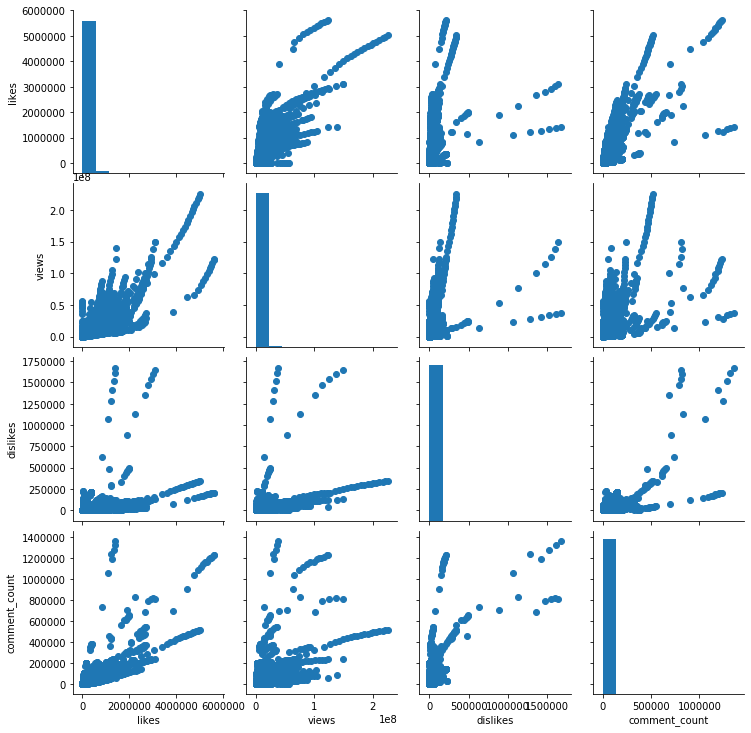

In [8]:
ax = sb.PairGrid(data = df, vars = ['likes', 'views', 'dislikes', 'comment_count'])
ax.map_diag(plt.hist)
ax.map_offdiag(plt.scatter)


## Find the p-value to measure the correlation between numaric variables
#### This map is also for correlaion between all variables in the dataset. Blue color indicates a higher correlation and white indicates weak correlation. The number inside each one is the p-value. A value between -1 and 1. When the number is closer to 1 thats indicate a strong positve correlation, when the number is close to -1 that indicates a strong negative correlation. 
#### Here we can see what is obvious from the map earlier. The positive correlation is between the four variables 

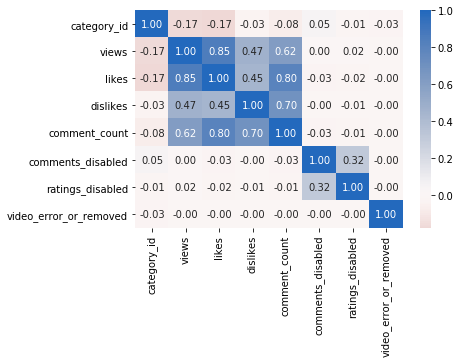

In [10]:
df2 =pd.read_csv('USvideos.csv')
sb.heatmap(df2.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle